<h1>Decision Trees - Universal Approximators</h1>

<h2>1. Introduction </h2>

Decision trees are universal approximators that use recursive partitioning to divide the datasets into homogenous subgroups.

<img src="media/decision_trees_.png" width="400px"/>

The <b>top node</b> is referred to as the <b>root node</b> and is the starting decision node. (i.e., Gender is Male or Female?). A <b>branch</b> is a subset of the dataset obtained as an outcome of a test. <b>Internal nodes</b> are decision nodes based on which subsequent branches are obtained. The <b>depth</b> of a node is the minimum number of decisions it takes to reach it from the root node. The leaf nodes are the end of the last branches on the tree which determine the output (class label or regression value).

<h2>2. Building a decision tree</h2>

Given a dataset of <b>n features and m records</b>, a rule-based graph is formed <b>iteratively by recursive partitioning</b> until the datasets is split in homogenous data groups representing the <b>same target class</b> in a classification problem or <b>sharing close target values</b> in a regression problem .

1. From the root node (i.e. with all the m records), the most informative attribute is identified using some feature important score. The <b>Gini index</b> is the most commonly used feature importance score among others (entropy, information gain)

$$ Gini(f) = \sum_{i=1}^{N_c}P(class=i|f)(1-P(class=i|f))  = 1 - \sum_{i=1}^{N_c}P(class=i|f)^2 $$

Overall Gini coefficient:

$$
Gini(f) = \frac{n_{S_i}}{n_{S_i}+n_{S_j}}Gini(f_{S_i}) + \frac{n_{S_j}}{n_{S_i}+n_{S_j}}Gini(f_{S_j})
$$

<b>The feature with the lowest gini index is selected</b>

For a regression problem, the quality of the split is typically measured using the mean squre error:

$$
\bar{y} = \frac{1}{n_{S_i}}\sum_{y\in S_i}^{}y
$$

$$
MSE(S_i) = \frac{1}{n_{S_i}}\sum_{i=1}^{n_{S_i}}(\bar{y}-y_i)^2
$$

2- Given an appropriate feature importance selection criterion, the decision tree is thus built as follows by recursive partitioning.

<b>Decision Tree Pseudo-code</b>

Step 1: Given M attributes in a dataset N records and a target variable y<br/>
Step 2: Rank features as per the chosen feature importance score<br/>
Step 3: Split the dataset by the feature with the best importance score<br/>
Step 4: Repeat Step 2 to each new subset until a stopping criterion is met

<h3>3. Pruning a decision tree</h3>

A decision tree can reach 100% fitting accuracy on the training set given that it can further split the data until a single data (i.e. guaranteed homogeneity) remains. However, this comes with the risk that the algorithm may lose its generalisation capability on unseen data. A pruning phase may post-process the decision tree, undermine some rules and allow some level of heterogeneity in the data subgroups to secure generalisation on unseen data.

<h2>Python Implementation</h2>

<h2>Classification problem<h2/>

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('../datasets/Healthcare-Diabetes.csv')

#-- Extract Features and the target variable
X = df.iloc[:,1:9]
y = df[['Outcome']]

#-- Split the Dataset in Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)



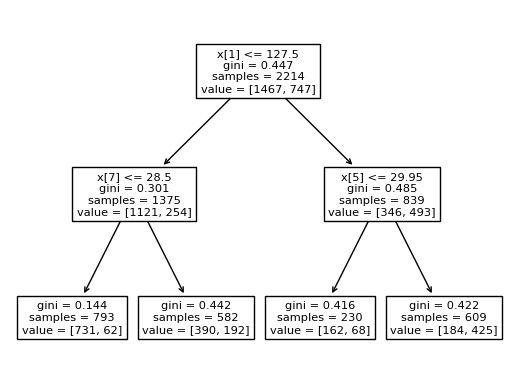

In [6]:
#Train the model

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

dt_classifier = DecisionTreeClassifier(criterion="gini",max_depth=2,min_samples_leaf=1)#Setting the decision tree - settings
dt_classifier.fit(X_train,y_train)#train the classifier

tree.plot_tree(dt_classifier)
plt.show()

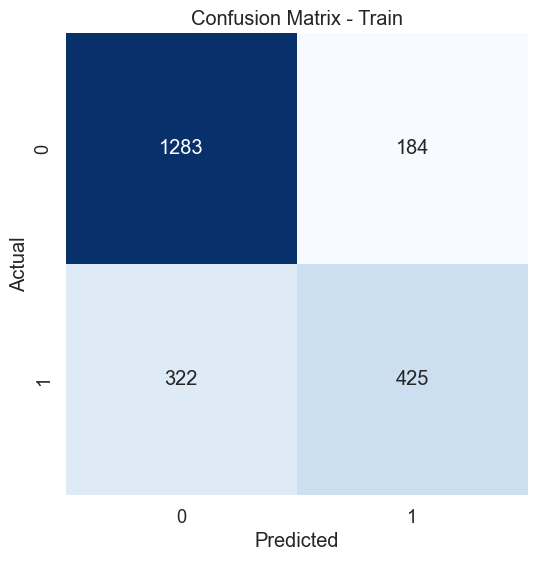

Classification Report:
               precision    recall  f1-score   support

has diabetes       0.80      0.87      0.84      1467
 no diabetes       0.70      0.57      0.63       747

    accuracy                           0.77      2214
   macro avg       0.75      0.72      0.73      2214
weighted avg       0.77      0.77      0.76      2214



In [9]:
# -- Benchmark the model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np

y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()

train_report = classification_report(y_train, y_pred_train, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", train_report)

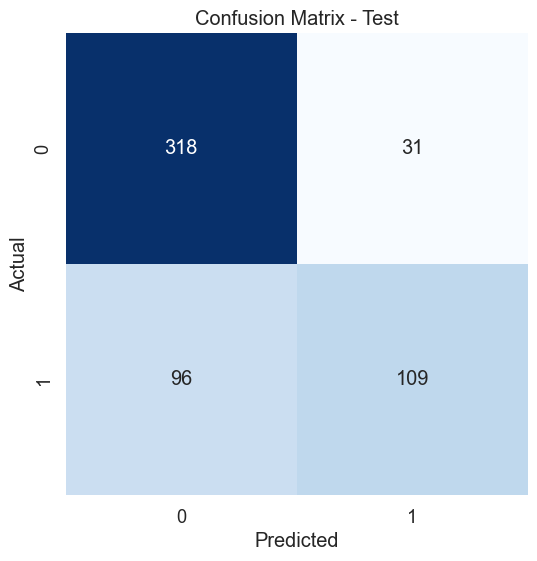

Classification Report:
               precision    recall  f1-score   support

has diabetes       0.77      0.91      0.83       349
 no diabetes       0.78      0.53      0.63       205

    accuracy                           0.77       554
   macro avg       0.77      0.72      0.73       554
weighted avg       0.77      0.77      0.76       554

Classification_acc:
 0.7707581227436823


In [11]:
# Create confusion matrix test set
cm_test = confusion_matrix(y_test, y_pred_test)
# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

#tn, fp, fn, tp = cm_test
class_acc = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])
test_report = classification_report(y_test, y_pred_test, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", test_report)
print("Classification_acc:\n", class_acc)

<h2>Regression problem<h2/>

In [14]:
#--load the datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('../datasets/real_estate_data.csv')
df = df.iloc[:,1:] #retrieve house pricing data
df.head()

#get the datasets description
#df.info()

#--extract features and the target variable

X = df.iloc[:,0:6]#get features
y = df.iloc[:,[6]]#get target variable
X.head()

#--Split the the training set from the test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)


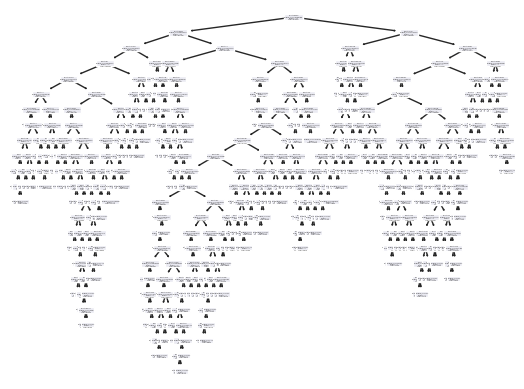

In [15]:
#--Build the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

dt_regressor = DecisionTreeRegressor(criterion="squared_error", max_depth=None, min_samples_leaf=1)#Setting the decision tree - settings
dt_regressor.fit(X_train,y_train)#train the classifier

tree.plot_tree(dt_regressor) #display the model rules
plt.show()

In [17]:
#--Compute the Coefficient of determination and visualise the goodness of fit for both the training and test setfrom sklearn.metrics import r2_score
from sklearn.metrics import r2_score

y_pred_train = dt_regressor.predict(X_train)#get model prediction on training set
y_pred_test = dt_regressor.predict(X_test)#get model prediction on test

r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

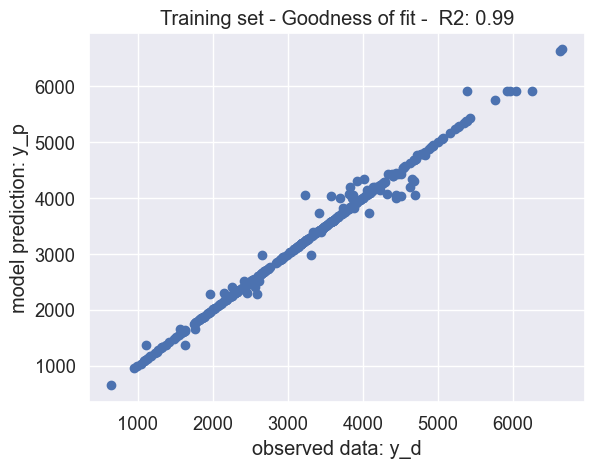

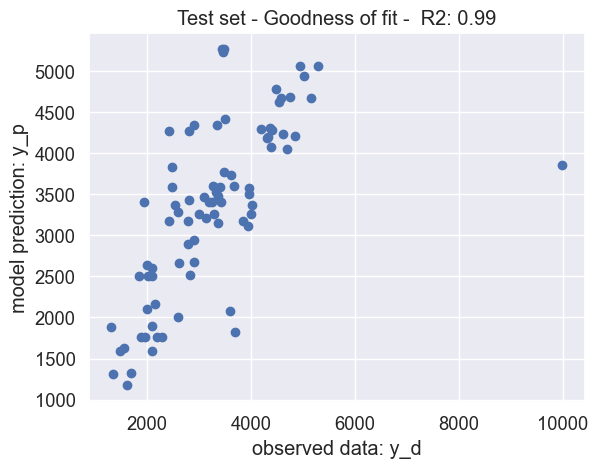

In [18]:
plt.figure()
plt.scatter(y_train, y_pred_train, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Training set - Goodness of fit -  R2: %.2f'%r2_score_train)
plt.show() 

plt.figure()
plt.scatter(y_test, y_pred_test, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Test set - Goodness of fit -  R2: %.2f'%r2_score_train)
plt.show() 